In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import pickle
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor as mor

In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
    error = error/len(Y_test)
    return error

In [96]:
dataset_name = 'dijkstra_physical.csv'
dataset_path = '\\ALL_CSV\\Dataset\\' + dataset_name
df = pd.read_csv(dataset_path)
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                         encoder_isa = None, encoder_mem_type=None)
total_data = encoded_data_frame.drop(columns = ['arch'])
total_data = total_data.fillna(0)
X = total_data.drop(columns = ['runtime','power']).to_numpy()
Y = total_data[['runtime','power']].to_numpy()
print('Data X and Y shape', X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Train Test Split:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Data X and Y shape (52, 26) (52, 2)
Train Test Split: (41, 26) (11, 26) (41, 2) (11, 2)


[0.97523559 0.99983273 0.99999987 0.99999998 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


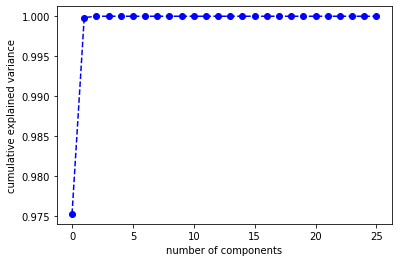

In [97]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--bo')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

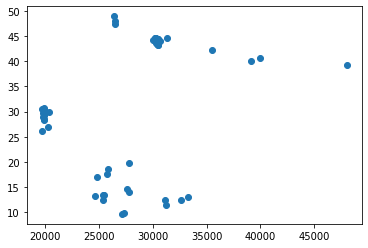

In [98]:
plt.scatter(Y[:,0], Y[:,1])

In [99]:
pca = PCA(n_components = 1)
pca.fit(Y_train)
Y_transformed = pca.transform(Y_train)

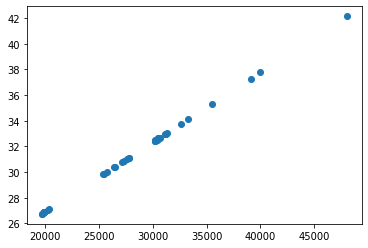

In [100]:
Y_recovered = pca.inverse_transform(Y_transformed)
plt.scatter(Y_recovered[:,0], Y_recovered[:,1])

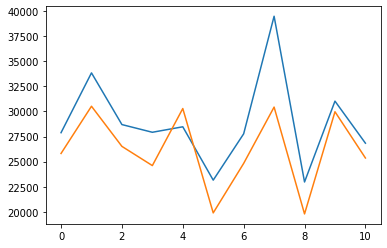

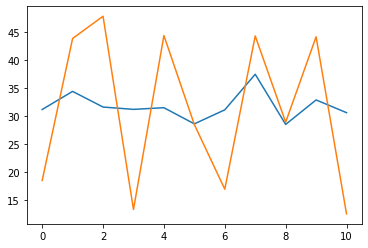

In [101]:
# lr = LinearRegression()
lr.fit(X_train, Y_transformed)
Y_pred = lr.predict(X_test)
Y_orig = pca.inverse_transform(Y_pred)
plt.plot(Y_orig[:,0])
plt.plot(Y_test[:,0])
plt.figure()
plt.plot(Y_orig[:,1])
plt.plot(Y_test[:,1])


In [102]:
print('R2: ', r2_score(Y_test, Y_orig ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_orig[:,0] ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_orig[:,1] ))

R2:  0.08928359321969409
APE Runtime:  0.11819268689222127
APE Power:  0.50800652394086


R2:  0.7280287593420129
APE Runtime:  0.07535081454033421
APE Power:  0.03246309330276751


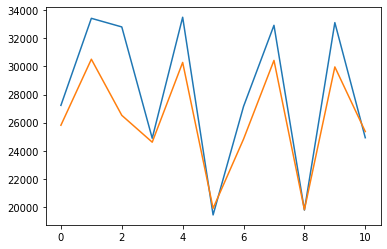

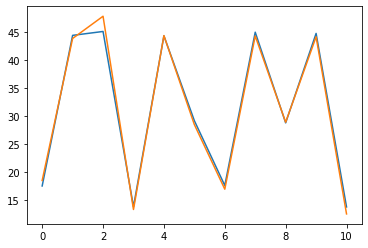

In [103]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
plt.plot(Y_pred[:,0])
plt.plot(Y_test[:,0])
plt.figure()
plt.plot(Y_pred[:,1])
plt.plot(Y_test[:,1])
print('R2: ', r2_score(Y_test, Y_pred ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_pred[:,0] ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_pred[:,1] ))

R2:  -0.8590768116493943
APE Runtime:  0.13984922688840282
APE Power:  0.09421860988952582


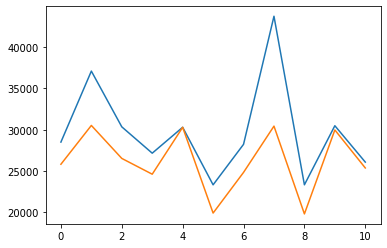

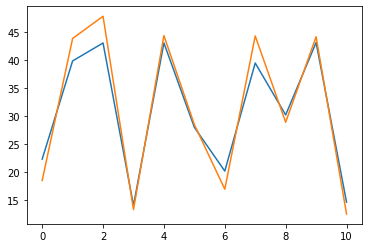

In [104]:
lr = ExtraTreesRegressor()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
plt.plot(Y_pred[:,0])
plt.plot(Y_test[:,0])
plt.figure()
plt.plot(Y_pred[:,1])
plt.plot(Y_test[:,1])
print('R2: ', r2_score(Y_test[:,0], Y_pred[:,0] ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_pred[:,0] ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_pred[:,1] ))

R2:  -0.1981907399306273
APE Runtime:  0.18211454327013277
APE Power:  0.3036726331714359


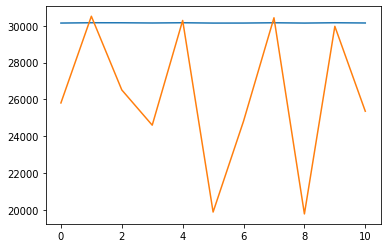

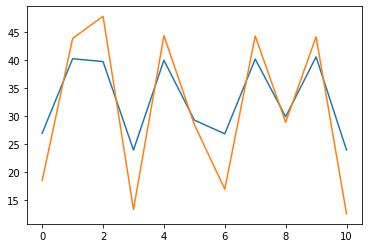

In [105]:
lr = mor(SVR())
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
plt.plot(Y_pred[:,0])
plt.plot(Y_test[:,0])
plt.figure()
plt.plot(Y_pred[:,1])
plt.plot(Y_test[:,1])
print('R2: ', r2_score(Y_test, Y_pred ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_pred[:,0] ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_pred[:,1] ))

R2:  0.6152097694127527
APE Runtime:  0.09307779222281787
APE Power:  0.10100625327348568


0.09704202274815177

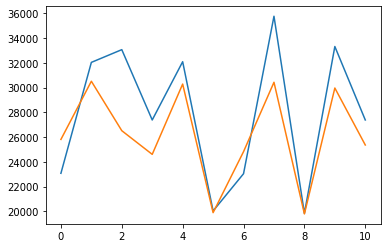

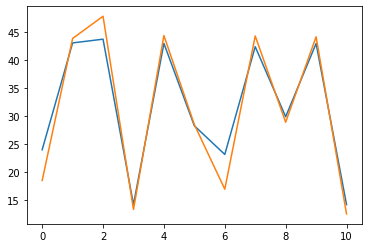

In [108]:
lr = KNeighborsRegressor()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
plt.plot(Y_pred[:,0])
plt.plot(Y_test[:,0])
plt.figure()
plt.plot(Y_pred[:,1])
plt.plot(Y_test[:,1])
print('R2: ', r2_score(Y_test, Y_pred ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_pred[:,0] ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_pred[:,1] ))
m1 = absolute_percentage_error(Y_test[:,0], Y_pred[:,0])
m2 = absolute_percentage_error(Y_test[:,1], Y_pred[:,1])
m = [m1, m2]
np.mean(m)

R2:  0.27934782266617475
APE Runtime:  0.09307779222281787
R2:  0.9510717161593304
APE Power:  0.10100625327348568
Mean R2: 0.6152097694127525
Mean APE: 0.09704202274815177


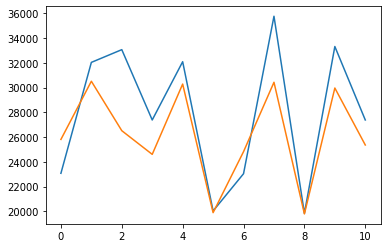

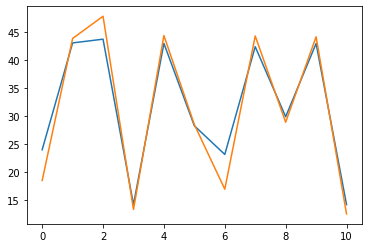

In [110]:
lr = KNeighborsRegressor()
lr.fit(X_train, Y_train[:,0])
Y_pred = lr.predict(X_test)
plt.plot(Y_pred)
plt.plot(Y_test[:,0])
print('R2: ', r2_score(Y_test[:,0], Y_pred ))
print('APE Runtime: ', absolute_percentage_error(Y_test[:,0], Y_pred ))

r1 = r2_score(Y_test[:,0], Y_pred )
m1 = absolute_percentage_error(Y_test[:,0], Y_pred )

plt.figure()
lr = KNeighborsRegressor()
lr.fit(X_train, Y_train[:,1])
Y_pred = lr.predict(X_test)
plt.plot(Y_pred)
plt.plot(Y_test[:,1])
print('R2: ', r2_score(Y_test[:,1], Y_pred ))
print('APE Power: ', absolute_percentage_error(Y_test[:,1], Y_pred ))

r2 = r2_score(Y_test[:,1], Y_pred )
m2 = absolute_percentage_error(Y_test[:,1], Y_pred )

print('Mean R2:', np.mean([r1,r2]))
print('Mean APE:', np.mean([m1,m2]))
